# Hypothesis 


Idea:
Seniors will take shorter trips on Citi Bike than younger people.

Null Hypothesis:
The mean trip duration of seniors' rides is greater than or equal to that of younger people.

H0:
The mean trip duration of trips taken by people born before 1953 (65 year old senior citizen) is greater than or not more than 2 sigma lower of the mean those of other ages.

$$ Mean(Senior Trip Duration) \geq  Mean(Younger Trip Duration) $$

H1:
The mean trip duration of trips taken by people born before 1953 (65 year old senior citizen) is more than 2 sigma lower of the mean those of other ages.

$$ Mean(Senior Trip Duration) <  Mean(Younger Trip Duration) $$

I want to use the trip duration column and the birth year columns of the data.  I also want to remove all rows that have a NaN value in the birth year column.

The data I'm going to use is from January 2017.



In [1]:
import pandas as pd
import pylab as pl
import seaborn as sns

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
! ls -l /gws/open/Student/citibike 

total 1466760
-rw-rw-r--. 1 dd cdf_curation 27074629 Jan 18  2017 201307-citibike-tripdata.zip
-rw-rw-r--. 1 dd cdf_curation 32090869 Jan 18  2017 201308-citibike-tripdata.zip
-rw-rw-r--. 1 dd cdf_curation 33155593 Jan 18  2017 201309-citibike-tripdata.zip
-rw-rw-r--. 1 dd cdf_curation 33065440 Jan 18  2017 201310-citibike-tripdata.zip
-rw-rw-r--. 1 dd cdf_curation 21618143 Jan 18  2017 201311-citibike-tripdata.zip
-rw-rw-r--. 1 dd cdf_curation 14314784 Jan 18  2017 201312-citibike-tripdata.zip
-rw-rw-r--. 1 dd cdf_curation  9697309 Jan 18  2017 201401-citibike-tripdata.zip
-rw-rw-r--. 1 dd cdf_curation  7245963 Jan 18  2017 201402-citibike-tripdata.zip
-rw-rw-r--. 1 dd cdf_curation 14132272 Jan 18  2017 201403-citibike-tripdata.zip
-rw-rw-r--. 1 dd cdf_curation 21414350 Jan 18  2017 201404-citibike-tripdata.zip
-rw-rw-r--. 1 dd cdf_curation 27591572 Jan 18  2017 201405-citibike-tripdata.zip
-rw-rw-r--. 1 dd cdf_curation 29902186 Jan 18  2017 201406-citibike-tripdata.zip
-rw-rw-r--. 1 

In [3]:
df = pd.read_csv('/gws/open/Student/citibike/201701-citibike-tripdata.csv.zip', compression='infer')

In [4]:
df.head()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,680,2017-01-01 00:00:21,2017-01-01 00:11:41,3226,W 82 St & Central Park West,40.782750,-73.971370,3165,Central Park West & W 72 St,40.775794,-73.976206,25542,Subscriber,1965.0,2
1,1282,2017-01-01 00:00:45,2017-01-01 00:22:08,3263,Cooper Square & E 7 St,40.729236,-73.990868,498,Broadway & W 32 St,40.748549,-73.988084,21136,Subscriber,1987.0,2
2,648,2017-01-01 00:00:57,2017-01-01 00:11:46,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,-73.961199,18147,Customer,NaN,0
3,631,2017-01-01 00:01:10,2017-01-01 00:11:42,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,-73.961199,21211,Customer,NaN,0
4,621,2017-01-01 00:01:25,2017-01-01 00:11:47,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,-73.961199,26819,Customer,NaN,0


In [5]:
# remove any rows with NaN for Birth Year
df = df.dropna(subset=['Birth Year'])

In [6]:
# drop extra columns
df.drop(['Start Time',
 'Stop Time',
 'Start Station ID',
 'Start Station Name',
 'Start Station Latitude',
 'Start Station Longitude',
 'End Station ID',
 'End Station Name',
 'End Station Latitude',
 'End Station Longitude',
 'Bike ID',
 'User Type',
 'Gender'] , axis=1, inplace=True)

In [7]:
# Show the reduced dataframe
df.head()

,Trip Duration,Birth Year
0,680,1965.0
1,1282,1987.0
5,666,2000.0
6,559,1973.0
7,826,1977.0


In [8]:
# Add a column for Senior or not
def sen_or_no(year) :
    if year < 1953:
        return(1)
    else:
        return(0)
df['senior'] = df['Birth Year'].apply(lambda x: sen_or_no(x))

# check values
pd.crosstab(df['senior'], df['Birth Year'],margins=True)
# Looks like some people are putting in false ages

Birth Year,1885.0,1886.0,1893.0,1895.0,1899.0,1900.0,1901.0,1910.0,1912.0,1915.0,...,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,All
senior,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,18095,13972,7995,4684,3853,2865,1928,1805,859,680098
1,56,10,6,3,25,90,24,13,21,8,...,0,0,0,0,0,0,0,0,0,17502
All,56,10,6,3,25,90,24,13,21,8,...,18095,13972,7995,4684,3853,2865,1928,1805,859,697600


In [9]:
# Looks like some people are putting in false ages
# I am certain there were 56 citibike rides by 132 year olds last January
# For this homework I'll set a cutoff of age 100
# Remove all rows with Birth Year before 1917

df = df[df['Birth Year'] > 1917]
# check values
pd.crosstab(df['senior'], df['Birth Year'],margins=True)

Birth Year,1918.0,1920.0,1921.0,1923.0,1926.0,1931.0,1932.0,1934.0,1935.0,1936.0,...,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,All
senior,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,18095,13972,7995,4684,3853,2865,1928,1805,859,680098
1,11,1,14,12,10,7,23,62,10,44,...,0,0,0,0,0,0,0,0,0,17240
All,11,1,14,12,10,7,23,62,10,44,...,18095,13972,7995,4684,3853,2865,1928,1805,859,697338


Populating the interactive namespace from numpy and matplotlib


([<matplotlib.axis.XTick at 0x7f2ca1174ef0>,
 <a list of 2 Text xticklabel objects>)

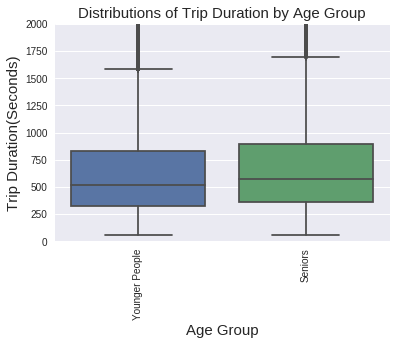

In [11]:
# Plot distributions with boxplot

%pylab inline

sns.boxplot(x='senior', y='Trip Duration', data=df)
plt.ylim(0, 2000)
plt.title('Distributions of Trip Duration by Age Group', fontsize = 15)
plt.xlabel('Age Group', fontsize = 15)
plt.ylabel('Trip Duration(Seconds)', fontsize = 15)
plt.xticks([0,1], ['Younger People', 'Seniors'], rotation='vertical')

The above boxplot shows that distribution of trip durations for seniors and younger people are relatively similar with seniors going for slightly longer rides